# Data Visualization with matplotlib

## Visualization using the matplotlib library

 __*Customization of plots is left as an excercise for the students to work on*__

In [1]:

import csv #Imports csv module to load data into python namespace
with open("covid_19_data.csv","r") as file:# Using context manager to handle opening of file. File is sopened in read mode
    print(file) # prints a file object 

<_io.TextIOWrapper name='covid_19_data.csv' mode='r' encoding='cp1252'>


In [2]:
with open("covid_19_data.csv","r") as file:
    for row in file:
        print(row)# prints each row of the file 

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered

1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0

2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0

3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0

4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0

5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0

6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0

7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0

8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0

9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0

10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0

11,01/22/2020,Heilongjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0

12,01/22/2020,Henan,Mainland China,1/22/2020 17:00,5.0,0.0,0.0

13,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0

14,01/22/2020,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,2


1479,02/14/2020,,Finland,2020-02-12T00:03:12,1.0,0.0,1.0

1480,02/14/2020,Tibet,Mainland China,2020-02-12T06:43:02,1.0,0.0,1.0

1481,02/14/2020,,Nepal,2020-02-12T14:43:03,1.0,0.0,1.0

1482,02/14/2020,,Sri Lanka,2020-02-08T03:43:03,1.0,0.0,1.0

1483,02/14/2020,,Sweden,2020-02-01T02:13:26,1.0,0.0,0.0

1484,02/14/2020,"Boston, MA",US,2020-02-01T19:43:03,1.0,0.0,0.0

1485,02/14/2020,"Los Angeles, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0

1486,02/14/2020,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0

1487,02/14/2020,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0

1488,02/14/2020,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0

1489,02/14/2020,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0

1490,02/14/2020,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0

1491,02/15/2020,Hubei,Mainland China,2020-02-15T23:13:05,56249.0,1596.0,5623.0

1492,02/15/2020,Guangdong,Mainland China,2020-02-15T14:03:04,1294.0,2.0,410.0

1493,02/15/2020,Henan,Mainland China,2020-02-15T12:13:08,1212.0,13.0,391.


2766,02/29/2020,,Lebanon,2020-02-29T01:53:03,4.0,0.0,0.0

2767,02/29/2020,,Mexico,2020-02-29T21:13:17,4.0,0.0,0.0

2768,02/29/2020,,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0

2769,02/29/2020,South Australia,Australia,2020-02-29T02:03:10,3.0,0.0,2.0

2770,02/29/2020,,Denmark,2020-02-29T18:03:05,3.0,0.0,0.0

2771,02/29/2020,,Finland,2020-02-29T05:23:03,3.0,0.0,1.0

2772,02/29/2020,,India,2020-02-16T07:43:02,3.0,0.0,3.0

2773,02/29/2020,,Philippines,2020-02-12T07:43:02,3.0,1.0,1.0

2774,02/29/2020,,Romania,2020-02-28T15:33:03,3.0,0.0,0.0

2775,02/29/2020,"Santa Clara, CA",US,2020-02-29T01:33:03,3.0,0.0,1.0

2776,02/29/2020,Western Australia,Australia,2020-02-29T23:13:06,2.0,0.0,0.0

2777,02/29/2020,,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0

2778,02/29/2020,,Russia,2020-02-12T14:43:03,2.0,0.0,2.0

2779,02/29/2020,"Chicago, IL",US,2020-02-09T19:03:03,2.0,0.0,2.0

2780,02/29/2020,"Sacramento County, CA",US,2020-02-27T20:33:02,2.0,0.0,0.0

2781,02/29/2020,"San Benito, CA",US,2020-02-03T03:53:02


3978,03/07/2020,"Tulsa County, OK",US,2020-03-07T04:43:02,1.0,0.0,0.0

3979,03/07/2020,"Umatilla, OR",US,2020-03-02T20:23:16,1.0,0.0,0.0

3980,03/07/2020,"Wake County, NC",US,2020-03-03T20:53:02,1.0,0.0,0.0

3981,03/07/2020,"Washoe County, NV",US,2020-03-06T19:43:02,1.0,0.0,0.0

3982,03/07/2020,"Wayne County, PA",US,2020-03-06T16:13:15,1.0,0.0,0.0

3983,03/07/2020,"Williamson County, TN",US,2020-03-05T23:33:03,1.0,0.0,0.0

3984,03/07/2020,"Yolo County, CA",US,2020-03-06T20:13:14,1.0,0.0,0.0

3985,03/07/2020,,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0

3986,03/07/2020,,Vatican City,2020-03-06T15:43:02,1.0,0.0,0.0

3987,03/07/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0

3988,03/07/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0

3989,03/07/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0

3990,03/07/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0

3991,03/07/2020,"Omaha, NE (From Diamond Princess)",US,

5477,03/14/2020,Pennsylvania,US,2020-03-14T18:53:03,47.0,0.0,0.0

5478,03/14/2020,Queensland,Australia,2020-03-14T13:33:04,46.0,0.0,8.0

5479,03/14/2020,,Serbia,2020-03-14T22:53:02,46.0,0.0,0.0

5480,03/14/2020,Diamond Princess cruise ship,US,2020-03-10T02:33:04,46.0,0.0,0.0

5481,03/14/2020,,Slovakia,2020-03-14T20:33:03,44.0,0.0,0.0

5482,03/14/2020,,Bulgaria,2020-03-14T20:33:03,41.0,2.0,0.0

5483,03/14/2020,Virginia,US,2020-03-14T22:33:03,41.0,1.0,0.0

5484,03/14/2020,,Brunei,2020-03-14T20:33:03,40.0,0.0,0.0

5485,03/14/2020,,Albania,2020-03-14T12:33:03,38.0,1.0,0.0

5486,03/14/2020,,Croatia,2020-03-14T20:33:03,38.0,0.0,1.0

5487,03/14/2020,,Peru,2020-03-14T12:33:03,38.0,0.0,0.0

5488,03/14/2020,,South Africa,2020-03-14T16:14:56,38.0,0.0,0.0

5489,03/14/2020,,Algeria,2020-03-14T12:33:03,37.0,3.0,12.0

5490,03/14/2020,,Panama,2020-03-14T12:33:03,36.0,1.0,0.0

5491,03/14/2020,,Argentina,2020-03-14T20:33:03,34.0,2.0,1.0

5492,03/14/2020,Oregon,US,2020-03-14T16:33:03,32.0,0.0,0.0

5493,0

Since the above code prints each row as a string , more manipulations needs to be done to extract required data items , hence the need of the csv module to ease the process.
This is what the snippet below takes care of

In [3]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.reader(file) #Uses the read method to extract items in each row as a list item
    for row in csv_reader:# csv_reader is an iterable
        print(row)# prints each observation as a list

['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']
['1', '01/22/2020', 'Anhui', 'Mainland China', '1/22/2020 17:00', '1.0', '0.0', '0.0']
['2', '01/22/2020', 'Beijing', 'Mainland China', '1/22/2020 17:00', '14.0', '0.0', '0.0']
['3', '01/22/2020', 'Chongqing', 'Mainland China', '1/22/2020 17:00', '6.0', '0.0', '0.0']
['4', '01/22/2020', 'Fujian', 'Mainland China', '1/22/2020 17:00', '1.0', '0.0', '0.0']
['5', '01/22/2020', 'Gansu', 'Mainland China', '1/22/2020 17:00', '0.0', '0.0', '0.0']
['6', '01/22/2020', 'Guangdong', 'Mainland China', '1/22/2020 17:00', '26.0', '0.0', '0.0']
['7', '01/22/2020', 'Guangxi', 'Mainland China', '1/22/2020 17:00', '2.0', '0.0', '0.0']
['8', '01/22/2020', 'Guizhou', 'Mainland China', '1/22/2020 17:00', '1.0', '0.0', '0.0']
['9', '01/22/2020', 'Hainan', 'Mainland China', '1/22/2020 17:00', '4.0', '0.0', '0.0']
['10', '01/22/2020', 'Hebei', 'Mainland China', '1/22/2020 17:00', '1.0', '0.0', '0.0

['807', '02/05/2020', '', 'United Arab Emirates', '2020-02-02T05:43:01', '5.0', '0.0', '0.0']
['808', '02/05/2020', 'New South Wales', 'Australia', '2020-02-01T18:12:49', '4.0', '0.0', '2.0']
['809', '02/05/2020', 'Victoria', 'Australia', '2020-02-01T18:12:49', '4.0', '0.0', '0.0']
['810', '02/05/2020', 'Queensland', 'Australia', '2020-02-04T16:53:03', '3.0', '0.0', '0.0']
['811', '02/05/2020', '', 'India', '2020-02-03T21:43:02', '3.0', '0.0', '0.0']
['812', '02/05/2020', 'South Australia', 'Australia', '2020-02-02T22:33:07', '2.0', '0.0', '0.0']
['813', '02/05/2020', 'British Columbia', 'Canada', '2020-02-05T17:33:03', '2.0', '0.0', '0.0']
['814', '02/05/2020', 'Toronto, ON', 'Canada', '2020-02-04T00:13:06', '2.0', '0.0', '0.0']
['815', '02/05/2020', '', 'Italy', '2020-01-31T08:15:53', '2.0', '0.0', '0.0']
['816', '02/05/2020', '', 'Philippines', '2020-02-02T03:33:07', '2.0', '1.0', '0.0']
['817', '02/05/2020', '', 'Russia', '2020-01-31T16:13:45', '2.0', '0.0', '0.0']
['818', '02/05/2

['1307', '02/12/2020', '', 'Germany', '2020-02-11T19:33:03', '16.0', '0.0', '0.0']
['1308', '02/12/2020', '', 'Vietnam', '2020-02-11T16:43:06', '15.0', '0.0', '6.0']
['1309', '02/12/2020', '', 'France', '2020-02-12T18:53:02', '11.0', '0.0', '2.0']
['1310', '02/12/2020', 'Macau', 'Macau', '2020-02-12T09:53:02', '10.0', '0.0', '2.0']
['1311', '02/12/2020', '', 'UK', '2020-02-12T19:03:06', '9.0', '0.0', '1.0']
['1312', '02/12/2020', '', 'United Arab Emirates', '2020-02-12T00:33:02', '8.0', '0.0', '1.0']
['1313', '02/12/2020', 'Queensland', 'Australia', '2020-02-09T19:33:02', '5.0', '0.0', '0.0']
['1314', '02/12/2020', 'New South Wales', 'Australia', '2020-02-06T03:13:22', '4.0', '0.0', '2.0']
['1315', '02/12/2020', 'Victoria', 'Australia', '2020-02-01T18:12:49', '4.0', '0.0', '0.0']
['1316', '02/12/2020', 'British Columbia', 'Canada', '2020-02-07T05:43:03', '4.0', '0.0', '0.0']
['1317', '02/12/2020', '', 'India', '2020-02-03T21:43:02', '3.0', '0.0', '0.0']
['1318', '02/12/2020', '', 'Ital

['2306', '02/25/2020', 'Shaanxi', 'Mainland China', '2020-02-25T15:23:04', '245.0', '1.0', '186.0']
['2307', '02/25/2020', 'Yunnan', 'Mainland China', '2020-02-25T04:53:02', '174.0', '2.0', '129.0']
['2308', '02/25/2020', '', 'Japan', '2020-02-25T14:53:03', '170.0', '1.0', '22.0']
['2309', '02/25/2020', 'Hainan', 'Mainland China', '2020-02-25T12:53:02', '168.0', '5.0', '124.0']
['2310', '02/25/2020', 'Guizhou', 'Mainland China', '2020-02-25T08:03:07', '146.0', '2.0', '104.0']
['2311', '02/25/2020', 'Tianjin', 'Mainland China', '2020-02-25T15:23:04', '135.0', '3.0', '91.0']
['2312', '02/25/2020', 'Shanxi', 'Mainland China', '2020-02-25T23:13:03', '133.0', '0.0', '98.0']
['2313', '02/25/2020', 'Liaoning', 'Mainland China', '2020-02-25T00:23:03', '121.0', '1.0', '83.0']
['2314', '02/25/2020', '', 'Iran', '2020-02-25T14:53:03', '95.0', '16.0', '0.0']
['2315', '02/25/2020', 'Jilin', 'Mainland China', '2020-02-25T15:23:04', '93.0', '1.0', '63.0']
['2316', '02/25/2020', 'Gansu', 'Mainland Chi

['2806', '02/29/2020', 'Boston, MA', 'US', '2020-02-28T21:13:12', '1.0', '0.0', '1.0']
['2807', '02/29/2020', 'Humboldt County, CA', 'US', '2020-02-21T05:13:09', '1.0', '0.0', '0.0']
['2808', '02/29/2020', 'Los Angeles, CA', 'US', '2020-02-01T19:53:03', '1.0', '0.0', '0.0']
['2809', '02/29/2020', 'Madison, WI', 'US', '2020-02-05T21:53:02', '1.0', '0.0', '0.0']
['2810', '02/29/2020', 'Orange, CA', 'US', '2020-02-01T19:53:03', '1.0', '0.0', '0.0']
['2811', '02/29/2020', 'Portland, OR', 'US', '2020-02-29T02:23:11', '1.0', '0.0', '0.0']
['2812', '02/29/2020', 'San Antonio, TX', 'US', '2020-02-13T18:53:02', '1.0', '0.0', '0.0']
['2813', '02/29/2020', 'Snohomish County, WA', 'US', '2020-02-29T15:03:04', '1.0', '0.0', '0.0']
['2814', '02/29/2020', 'Tempe, AZ', 'US', '2020-02-25T21:23:03', '1.0', '0.0', '1.0']
['2815', '02/29/2020', 'From Diamond Princess', 'Australia', '2020-02-29T02:03:10', '0.0', '0.0', '0.0']
['2816', '02/29/2020', 'Lackland, TX (From Diamond Princess)', 'US', '2020-02-24T

['3805', '03/07/2020', 'Shanxi', 'Mainland China', '2020-03-05T14:53:03', '133.0', '0.0', '126.0']
['3806', '03/07/2020', 'Liaoning', 'Mainland China', '2020-03-07T14:53:02', '125.0', '1.0', '107.0']
['3807', '03/07/2020', 'Gansu', 'Mainland China', '2020-03-07T15:03:06', '120.0', '2.0', '87.0']
['3808', '03/07/2020', 'Hong Kong', 'Hong Kong', '2020-03-07T10:13:22', '108.0', '2.0', '51.0']
['3809', '03/07/2020', 'Jilin', 'Mainland China', '2020-03-06T10:23:03', '93.0', '1.0', '90.0']
['3810', '03/07/2020', '', 'Malaysia', '2020-03-07T17:53:03', '93.0', '0.0', '23.0']
['3811', '03/07/2020', '', 'Bahrain', '2020-03-07T18:13:26', '85.0', '0.0', '4.0']
['3812', '03/07/2020', '', 'Austria', '2020-03-07T17:53:03', '79.0', '0.0', '0.0']
['3813', '03/07/2020', 'Xinjiang', 'Mainland China', '2020-03-07T09:03:05', '76.0', '3.0', '72.0']
['3814', '03/07/2020', 'Inner Mongolia', 'Mainland China', '2020-03-07T03:43:01', '75.0', '1.0', '67.0']
['3815', '03/07/2020', 'Ningxia', 'Mainland China', '202

['4290', '03/09/2020', 'Hong Kong', 'Hong Kong', '2020-03-09T10:03:17', '115.0', '3.0', '59.0']
['4291', '03/09/2020', 'Westchester County, NY', 'US', '2020-03-09T17:13:16', '98.0', '0.0', '0.0']
['4292', '03/09/2020', '', 'Bahrain', '2020-03-09T10:03:17', '95.0', '0.0', '14.0']
['4293', '03/09/2020', 'Jilin', 'Mainland China', '2020-03-09T14:33:03', '93.0', '1.0', '91.0']
['4294', '03/09/2020', '', 'Denmark', '2020-03-09T18:13:11', '90.0', '0.0', '1.0']
['4295', '03/09/2020', 'King County, WA', 'US', '2020-03-08T20:23:09', '83.0', '17.0', '1.0']
['4296', '03/09/2020', 'Xinjiang', 'Mainland China', '2020-03-08T05:33:02', '76.0', '3.0', '73.0']
['4297', '03/09/2020', 'Inner Mongolia', 'Mainland China', '2020-03-08T05:13:06', '75.0', '1.0', '70.0']
['4298', '03/09/2020', 'Ningxia', 'Mainland China', '2020-03-06T12:53:03', '75.0', '0.0', '71.0']
['4299', '03/09/2020', '', 'Greece', '2020-03-08T17:23:07', '73.0', '0.0', '0.0']
['4300', '03/09/2020', '', 'Kuwait', '2020-03-08T15:33:04', '64

['5304', '03/13/2020', '', 'Spain', '2020-03-11T20:00:00', '5232.0', '133.0', '193.0']
['5305', '03/13/2020', '', 'Malaysia', '2020-03-11T20:00:00', '197.0', '0.0', '26.0']
['5306', '03/13/2020', '', 'Holy See', '2020-03-11T20:00:00', '1.0', '0.0', '0.0']
['5307', '03/13/2020', '', 'Serbia', '2020-03-11T20:00:00', '35.0', '0.0', '0.0']
['5308', '03/13/2020', '', 'Cameroon', '2020-03-11T20:00:00', '2.0', '0.0', '0.0']
['5309', '03/13/2020', '', 'Slovakia', '2020-03-11T20:00:00', '32.0', '0.0', '0.0']
['5310', '03/13/2020', '', 'Togo', '2020-03-11T20:00:00', '1.0', '0.0', '0.0']
['5311', '03/13/2020', '', 'Peru', '2020-03-11T20:00:00', '28.0', '0.0', '0.0']
['5312', '03/13/2020', '', 'Romania', '2020-03-11T20:00:00', '89.0', '0.0', '7.0']
['5313', '03/13/2020', '', 'Mexico', '2020-03-11T20:00:00', '12.0', '0.0', '4.0']
['5314', '03/13/2020', '', 'Colombia', '2020-03-11T20:00:00', '13.0', '0.0', '0.0']
['5315', '03/13/2020', 'Grand Princess', 'US', '2020-03-11T20:00:00', '21.0', '0.0', '0

['5526', '03/14/2020', 'Iowa', 'US', '2020-03-13T23:53:03', '17.0', '0.0', '0.0']
['5527', '03/14/2020', 'Indiana', 'US', '2020-03-14T16:53:03', '16.0', '0.0', '0.0']
['5528', '03/14/2020', '', 'Azerbaijan', '2020-03-13T12:13:36', '15.0', '1.0', '3.0']
['5529', '03/14/2020', '', 'North Macedonia', '2020-03-13T23:33:05', '14.0', '0.0', '1.0']
['5530', '03/14/2020', 'Kentucky', 'US', '2020-03-13T23:53:03', '14.0', '0.0', '0.0']
['5531', '03/14/2020', 'Nebraska', 'US', '2020-03-14T16:53:03', '14.0', '0.0', '0.0']
['5532', '03/14/2020', '', 'Moldova', '2020-03-14T20:53:02', '12.0', '0.0', '0.0']
['5533', '03/14/2020', 'Arizona', 'US', '2020-03-14T18:13:23', '12.0', '0.0', '1.0']
['5534', '03/14/2020', 'Arkansas', 'US', '2020-03-14T22:33:03', '12.0', '0.0', '0.0']
['5535', '03/14/2020', '', 'Afghanistan', '2020-03-14T14:53:04', '11.0', '0.0', '0.0']
['5536', '03/14/2020', '', 'Dominican Republic', '2020-03-14T20:53:02', '11.0', '0.0', '0.0']
['5537', '03/14/2020', '', 'Bolivia', '2020-03-14

## Convertion to hash map

It will be easier to work with a dictionary  instead of a list , hence the csv *DictRader* method is used to take care of this

In [4]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)# Returns a dictionary
    for row in csv_reader:
        print(row)

OrderedDict([('SNo', '1'), ('ObservationDate', '01/22/2020'), ('Province/State', 'Anhui'), ('Country/Region', 'Mainland China'), ('Last Update', '1/22/2020 17:00'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '2'), ('ObservationDate', '01/22/2020'), ('Province/State', 'Beijing'), ('Country/Region', 'Mainland China'), ('Last Update', '1/22/2020 17:00'), ('Confirmed', '14.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '3'), ('ObservationDate', '01/22/2020'), ('Province/State', 'Chongqing'), ('Country/Region', 'Mainland China'), ('Last Update', '1/22/2020 17:00'), ('Confirmed', '6.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4'), ('ObservationDate', '01/22/2020'), ('Province/State', 'Fujian'), ('Country/Region', 'Mainland China'), ('Last Update', '1/22/2020 17:00'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5'), ('ObservationDate', '01/22/2020'), ('Province/Sta

OrderedDict([('SNo', '409'), ('ObservationDate', '01/30/2020'), ('Province/State', 'Illinois'), ('Country/Region', 'US'), ('Last Update', '1/30/20 16:00'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '410'), ('ObservationDate', '01/30/2020'), ('Province/State', 'California'), ('Country/Region', 'US'), ('Last Update', '1/30/20 16:00'), ('Confirmed', '2.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '411'), ('ObservationDate', '01/30/2020'), ('Province/State', 'Arizona'), ('Country/Region', 'US'), ('Last Update', '1/30/20 16:00'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '412'), ('ObservationDate', '01/30/2020'), ('Province/State', ''), ('Country/Region', 'Japan'), ('Last Update', '1/30/20 16:00'), ('Confirmed', '11.0'), ('Deaths', '0.0'), ('Recovered', '1.0')])
OrderedDict([('SNo', '413'), ('ObservationDate', '01/30/2020'), ('Province/State', ''), ('Country/Region', 'Thailand'), ('L

OrderedDict([('SNo', '635'), ('ObservationDate', '02/03/2020'), ('Province/State', 'Chongqing'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-03T23:43:02'), ('Confirmed', '337.0'), ('Deaths', '2.0'), ('Recovered', '9.0')])
OrderedDict([('SNo', '636'), ('ObservationDate', '02/03/2020'), ('Province/State', 'Jiangsu'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-03T11:03:10'), ('Confirmed', '271.0'), ('Deaths', '0.0'), ('Recovered', '8.0')])
OrderedDict([('SNo', '637'), ('ObservationDate', '02/03/2020'), ('Province/State', 'Shandong'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-03T17:11:34'), ('Confirmed', '259.0'), ('Deaths', '0.0'), ('Recovered', '7.0')])
OrderedDict([('SNo', '638'), ('ObservationDate', '02/03/2020'), ('Province/State', 'Sichuan'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-03T11:23:23'), ('Confirmed', '254.0'), ('Deaths', '1.0'), ('Recovered', '14.0')])
OrderedDict([('SNo', '639'), ('Observati

OrderedDict([('SNo', '1132'), ('ObservationDate', '02/10/2020'), ('Province/State', 'Chongqing'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-10T23:43:02'), ('Confirmed', '486.0'), ('Deaths', '2.0'), ('Recovered', '66.0')])
OrderedDict([('SNo', '1133'), ('ObservationDate', '02/10/2020'), ('Province/State', 'Shandong'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-10T09:33:02'), ('Confirmed', '466.0'), ('Deaths', '1.0'), ('Recovered', '66.0')])
OrderedDict([('SNo', '1134'), ('ObservationDate', '02/10/2020'), ('Province/State', 'Sichuan'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-10T10:03:02'), ('Confirmed', '405.0'), ('Deaths', '1.0'), ('Recovered', '80.0')])
OrderedDict([('SNo', '1135'), ('ObservationDate', '02/10/2020'), ('Province/State', 'Beijing'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-10T03:13:08'), ('Confirmed', '337.0'), ('Deaths', '2.0'), ('Recovered', '44.0')])
OrderedDict([('SNo', '1136'), ('O

OrderedDict([('SNo', '1515'), ('ObservationDate', '02/15/2020'), ('Province/State', 'Liaoning'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-15T09:53:01'), ('Confirmed', '119.0'), ('Deaths', '1.0'), ('Recovered', '31.0')])
OrderedDict([('SNo', '1516'), ('ObservationDate', '02/15/2020'), ('Province/State', 'Gansu'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-15T12:13:08'), ('Confirmed', '90.0'), ('Deaths', '2.0'), ('Recovered', '49.0')])
OrderedDict([('SNo', '1517'), ('ObservationDate', '02/15/2020'), ('Province/State', 'Jilin'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-15T12:13:08'), ('Confirmed', '88.0'), ('Deaths', '1.0'), ('Recovered', '26.0')])
OrderedDict([('SNo', '1518'), ('ObservationDate', '02/15/2020'), ('Province/State', ''), ('Country/Region', 'Singapore'), ('Last Update', '2020-02-15T23:53:02'), ('Confirmed', '72.0'), ('Deaths', '0.0'), ('Recovered', '18.0')])
OrderedDict([('SNo', '1519'), ('ObservationDate', '02/

OrderedDict([('SNo', '1681'), ('ObservationDate', '02/17/2020'), ('Province/State', ''), ('Country/Region', 'France'), ('Last Update', '2020-02-15T20:53:02'), ('Confirmed', '12.0'), ('Deaths', '1.0'), ('Recovered', '4.0')])
OrderedDict([('SNo', '1682'), ('ObservationDate', '02/17/2020'), ('Province/State', 'Macau'), ('Country/Region', 'Macau'), ('Last Update', '2020-02-16T12:03:06'), ('Confirmed', '10.0'), ('Deaths', '0.0'), ('Recovered', '5.0')])
OrderedDict([('SNo', '1683'), ('ObservationDate', '02/17/2020'), ('Province/State', ''), ('Country/Region', 'UK'), ('Last Update', '2020-02-16T16:23:06'), ('Confirmed', '9.0'), ('Deaths', '0.0'), ('Recovered', '8.0')])
OrderedDict([('SNo', '1684'), ('ObservationDate', '02/17/2020'), ('Province/State', ''), ('Country/Region', 'United Arab Emirates'), ('Last Update', '2020-02-16T20:43:02'), ('Confirmed', '9.0'), ('Deaths', '0.0'), ('Recovered', '4.0')])
OrderedDict([('SNo', '1685'), ('ObservationDate', '02/17/2020'), ('Province/State', 'Queensl

OrderedDict([('SNo', '2082'), ('ObservationDate', '02/22/2020'), ('Province/State', 'South Australia'), ('Country/Region', 'Australia'), ('Last Update', '2020-02-17T08:13:09'), ('Confirmed', '2.0'), ('Deaths', '0.0'), ('Recovered', '2.0')])
OrderedDict([('SNo', '2083'), ('ObservationDate', '02/22/2020'), ('Province/State', 'Toronto, ON'), ('Country/Region', 'Canada'), ('Last Update', '2020-02-21T05:23:04'), ('Confirmed', '2.0'), ('Deaths', '0.0'), ('Recovered', '2.0')])
OrderedDict([('SNo', '2084'), ('ObservationDate', '02/22/2020'), ('Province/State', ''), ('Country/Region', 'Russia'), ('Last Update', '2020-02-12T14:43:03'), ('Confirmed', '2.0'), ('Deaths', '0.0'), ('Recovered', '2.0')])
OrderedDict([('SNo', '2085'), ('ObservationDate', '02/22/2020'), ('Province/State', ''), ('Country/Region', 'Spain'), ('Last Update', '2020-02-15T17:23:04'), ('Confirmed', '2.0'), ('Deaths', '0.0'), ('Recovered', '2.0')])
OrderedDict([('SNo', '2086'), ('ObservationDate', '02/22/2020'), ('Province/Stat

OrderedDict([('SNo', '2414'), ('ObservationDate', '02/26/2020'), ('Province/State', 'Inner Mongolia'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-26T15:03:05'), ('Confirmed', '75.0'), ('Deaths', '0.0'), ('Recovered', '38.0')])
OrderedDict([('SNo', '2415'), ('ObservationDate', '02/26/2020'), ('Province/State', 'Ningxia'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-26T03:53:01'), ('Confirmed', '71.0'), ('Deaths', '0.0'), ('Recovered', '65.0')])
OrderedDict([('SNo', '2416'), ('ObservationDate', '02/26/2020'), ('Province/State', 'Unassigned Location (From Diamond Princess)'), ('Country/Region', 'US'), ('Last Update', '2020-02-26T20:03:06'), ('Confirmed', '42.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '2417'), ('ObservationDate', '02/26/2020'), ('Province/State', ''), ('Country/Region', 'Thailand'), ('Last Update', '2020-02-26T07:23:03'), ('Confirmed', '40.0'), ('Deaths', '0.0'), ('Recovered', '22.0')])
OrderedDict([('SNo', '2

OrderedDict([('SNo', '2566'), ('ObservationDate', '02/27/2020'), ('Province/State', ''), ('Country/Region', 'Georgia'), ('Last Update', '2020-02-27T16:23:03'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '2567'), ('ObservationDate', '02/27/2020'), ('Province/State', 'Tibet'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-02-12T06:43:02'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '1.0')])
OrderedDict([('SNo', '2568'), ('ObservationDate', '02/27/2020'), ('Province/State', ''), ('Country/Region', 'Nepal'), ('Last Update', '2020-02-12T14:43:03'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '1.0')])
OrderedDict([('SNo', '2569'), ('ObservationDate', '02/27/2020'), ('Province/State', ''), ('Country/Region', 'Netherlands'), ('Last Update', '2020-02-27T21:13:10'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '2570'), ('ObservationDate', '02/27/2020'), ('Province/State', ''), (

OrderedDict([('SNo', '3631'), ('ObservationDate', '03/06/2020'), ('Province/State', 'British Columbia'), ('Country/Region', 'Canada'), ('Last Update', '2020-03-06T04:43:03'), ('Confirmed', '21.0'), ('Deaths', '0.0'), ('Recovered', '3.0')])
OrderedDict([('SNo', '3632'), ('ObservationDate', '03/06/2020'), ('Province/State', ''), ('Country/Region', 'Israel'), ('Last Update', '2020-03-06T20:33:03'), ('Confirmed', '21.0'), ('Deaths', '0.0'), ('Recovered', '2.0')])
OrderedDict([('SNo', '3633'), ('ObservationDate', '03/06/2020'), ('Province/State', ''), ('Country/Region', 'San Marino'), ('Last Update', '2020-03-05T13:53:03'), ('Confirmed', '21.0'), ('Deaths', '1.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '3634'), ('ObservationDate', '03/06/2020'), ('Province/State', 'Santa Clara, CA'), ('Country/Region', 'US'), ('Last Update', '2020-03-05T22:53:03'), ('Confirmed', '20.0'), ('Deaths', '0.0'), ('Recovered', '1.0')])
OrderedDict([('SNo', '3635'), ('ObservationDate', '03/06/2020'), ('Provin

OrderedDict([('SNo', '4020'), ('ObservationDate', '03/08/2020'), ('Province/State', 'Guangxi'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-03-08T00:23:02'), ('Confirmed', '252.0'), ('Deaths', '2.0'), ('Recovered', '223.0')])
OrderedDict([('SNo', '4021'), ('ObservationDate', '03/08/2020'), ('Province/State', 'Shaanxi'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-03-08T14:43:03'), ('Confirmed', '245.0'), ('Deaths', '1.0'), ('Recovered', '227.0')])
OrderedDict([('SNo', '4022'), ('ObservationDate', '03/08/2020'), ('Province/State', ''), ('Country/Region', 'Sweden'), ('Last Update', '2020-03-08T14:03:12'), ('Confirmed', '203.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4023'), ('ObservationDate', '03/08/2020'), ('Province/State', ''), ('Country/Region', 'Belgium'), ('Last Update', '2020-03-08T17:23:07'), ('Confirmed', '200.0'), ('Deaths', '0.0'), ('Recovered', '1.0')])
OrderedDict([('SNo', '4024'), ('ObservationDate', '03/08/2020'), 

OrderedDict([('SNo', '4130'), ('ObservationDate', '03/08/2020'), ('Province/State', ''), ('Country/Region', 'Luxembourg'), ('Last Update', '2020-03-08T05:13:06'), ('Confirmed', '3.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4131'), ('ObservationDate', '03/08/2020'), ('Province/State', ''), ('Country/Region', 'Malta'), ('Last Update', '2020-03-08T09:13:16'), ('Confirmed', '3.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4132'), ('ObservationDate', '03/08/2020'), ('Province/State', ''), ('Country/Region', 'North Macedonia'), ('Last Update', '2020-03-06T20:23:11'), ('Confirmed', '3.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4133'), ('ObservationDate', '03/08/2020'), ('Province/State', ''), ('Country/Region', 'Saint Barthelemy'), ('Last Update', '2020-03-04T02:43:03'), ('Confirmed', '3.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4134'), ('ObservationDate', '03/08/2020'), ('Province/State', ''

OrderedDict([('SNo', '4902'), ('ObservationDate', '03/11/2020'), ('Province/State', 'New Brunswick'), ('Country/Region', 'Canada'), ('Last Update', '2020-03-11T23:13:06'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4903'), ('ObservationDate', '03/11/2020'), ('Province/State', 'Tibet'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-03-11T02:18:14'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '1.0')])
OrderedDict([('SNo', '4904'), ('ObservationDate', '03/11/2020'), ('Province/State', ''), ('Country/Region', 'Congo (Kinshasa)'), ('Last Update', '2020-03-11T21:13:24'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4905'), ('ObservationDate', '03/11/2020'), ('Province/State', ''), ('Country/Region', 'Ivory Coast'), ('Last Update', '2020-03-11T23:33:03'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '4906'), ('ObservationDate', '03/11/2020'), ('

OrderedDict([('SNo', '5129'), ('ObservationDate', '03/12/2020'), ('Province/State', ''), ('Country/Region', 'Holy See'), ('Last Update', '2020-03-10T19:13:21'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5130'), ('ObservationDate', '03/12/2020'), ('Province/State', ''), ('Country/Region', 'Jordan'), ('Last Update', '2020-03-03T15:33:02'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5131'), ('ObservationDate', '03/12/2020'), ('Province/State', ''), ('Country/Region', 'Liechtenstein'), ('Last Update', '2020-03-04T01:33:07'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5132'), ('ObservationDate', '03/12/2020'), ('Province/State', ''), ('Country/Region', 'Mongolia'), ('Last Update', '2020-03-10T06:13:43'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5133'), ('ObservationDate', '03/12/2020'), ('Province/State', ''), ('Countr

OrderedDict([('SNo', '5240'), ('ObservationDate', '03/13/2020'), ('Province/State', 'United Kingdom'), ('Country/Region', 'UK'), ('Last Update', '2020-03-11T20:00:00'), ('Confirmed', '798.0'), ('Deaths', '8.0'), ('Recovered', '18.0')])
OrderedDict([('SNo', '5241'), ('ObservationDate', '03/13/2020'), ('Province/State', ''), ('Country/Region', 'Netherlands'), ('Last Update', '2020-03-11T20:00:00'), ('Confirmed', '804.0'), ('Deaths', '10.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5242'), ('ObservationDate', '03/13/2020'), ('Province/State', ''), ('Country/Region', 'Cuba'), ('Last Update', '2020-03-11T20:00:00'), ('Confirmed', '4.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5243'), ('ObservationDate', '03/13/2020'), ('Province/State', 'Quebec'), ('Country/Region', 'Canada'), ('Last Update', '2020-03-11T20:00:00'), ('Confirmed', '17.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])
OrderedDict([('SNo', '5244'), ('ObservationDate', '03/13/2020'), ('Province/State'

OrderedDict([('SNo', '5954'), ('ObservationDate', '03/16/2020'), ('Province/State', ''), ('Country/Region', 'Egypt'), ('Last Update', '2020-03-16T15:53:45'), ('Confirmed', '150.0'), ('Deaths', '2.0'), ('Recovered', '27.0')])
OrderedDict([('SNo', '5955'), ('ObservationDate', '03/16/2020'), ('Province/State', ''), ('Country/Region', 'Thailand'), ('Last Update', '2020-03-16T14:38:45'), ('Confirmed', '147.0'), ('Deaths', '1.0'), ('Recovered', '35.0')])
OrderedDict([('SNo', '5956'), ('ObservationDate', '03/16/2020'), ('Province/State', 'Guizhou'), ('Country/Region', 'Mainland China'), ('Last Update', '2020-03-16T14:38:45'), ('Confirmed', '146.0'), ('Deaths', '2.0'), ('Recovered', '144.0')])
OrderedDict([('SNo', '5957'), ('ObservationDate', '03/16/2020'), ('Province/State', ''), ('Country/Region', 'Philippines'), ('Last Update', '2020-03-16T14:38:45'), ('Confirmed', '142.0'), ('Deaths', '12.0'), ('Recovered', '2.0')])
OrderedDict([('SNo', '5958'), ('ObservationDate', '03/16/2020'), ('Provinc

In [5]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    for row in csv_reader:
        print(row['Confirmed'])# returns the item with a key of "confirmed"

1.0
14.0
6.0
1.0
0.0
26.0
2.0
1.0
4.0
1.0
0.0
5.0
0.0
444.0
4.0
0.0
1.0
2.0
0.0
2.0
1.0
1.0
0.0
0.0
2.0
9.0
1.0
5.0
1.0
4.0
0.0
1.0
0.0
1.0
10.0
2.0
2.0
1.0
9.0
22.0
9.0
5.0
2.0
32.0
5.0
3.0
5.0
1.0
2.0
5.0
2.0
444.0
9.0
0.0
5.0
7.0
1.0
3.0
2.0
1.0
0.0
3.0
6.0
16.0
1.0
8.0
1.0
4.0
0.0
1.0
2.0
2.0
27.0
1.0
3.0
1.0
1.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
549.0
53.0
43.0
36.0
27.0
24.0
23.0
20.0
18.0
15.0
15.0
15.0
10.0
9.0
9.0
8.0
8.0
5.0
5.0
4.0
4.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
0.0
1.0
1.0
2.0
5.0
2.0
3.0
2.0
2.0
761.0
78.0
62.0
57.0
43.0
41.0
39.0
33.0
32.0
28.0
27.0
23.0
19.0
18.0
18.0
18.0
17.0
15.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
4.0
4.0
3.0
3.0
3.0
2.0
1.0
1.0
1.0
2.0
7.0
2.0
3.0
2.0
3.0
4.0
1.0
3.0
1058.0
111.0
104.0
83.0
75.0
69.0
68.0
60.0
46.0
44.0
40.0
36.0
36.0
35.0
33.0
22.0
22.0
21.0
16.0
15.0
14.0
13.0
9.0
8.0
7.0
7.0
5.0
5.0
4.0
4.0
4.0
4.0
1.0
1.0
1.0
2.0
1.0
4.0
8.0
3.0
4.0
2.0
3.0
4.0
1.0
4.0
1.0
1423.0
151.0
128.0
128.0
110.0
100.0
80.0
75.0
72.0
70.0
69.0
59

2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
64084.0
1342.0
1271.0
1205.0
1016.0
989.0
934.0
754.0
691.0
631.0
602.0
575.0
526.0
480.0
399.0
335.0
311.0
293.0
249.0
245.0
174.0
168.0
155.0
147.0
146.0
135.0
132.0
121.0
91.0
91.0
89.0
76.0
75.0
74.0
71.0
43.0
35.0
28.0
22.0
18.0
16.0
16.0
13.0
12.0
11.0
10.0
9.0
7.0
6.0
5.0
5.0
4.0
4.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
64287.0
1345.0
1271.0
1205.0
1016.0
989.0
934.0
833.0
755.0
691.0
631.0
576.0
527.0
480.0
399.0
335.0
311.0
293.0
251.0
245.0
229.0
174.0
168.0
159.0
146.0
135.0
133.0
121.0
93.0
91.0
89.0
79.0
76.0
75.0
71.0
61.0
36.0
35.0
30.0
22.0
18.0
16.0
16.0
13.0
13.0
12.0
10.0
7.0
6.0
5.0
4.0
4.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
64786.0
1347.0
1271.0
1205.

0.0
0.0
0.0
0.0
67707.0
7375.0
7314.0
6566.0
1352.0
1272.0
1215.0
1126.0
1040.0
1018.0
990.0
935.0
758.0
696.0
673.0
631.0
576.0
539.0
502.0
481.0
428.0
342.0
337.0
318.0
296.0
273.0
265.0
252.0
245.0
203.0
200.0
176.0
174.0
168.0
150.0
146.0
136.0
133.0
125.0
124.0
114.0
104.0
99.0
93.0
85.0
83.0
83.0
76.0
75.0
75.0
73.0
64.0
60.0
50.0
50.0
49.0
45.0
45.0
45.0
39.0
39.0
38.0
38.0
36.0
35.0
32.0
31.0
31.0
30.0
30.0
28.0
27.0
23.0
22.0
21.0
21.0
20.0
19.0
19.0
18.0
17.0
16.0
16.0
15.0
15.0
15.0
14.0
14.0
13.0
12.0
12.0
12.0
12.0
11.0
11.0
11.0
10.0
10.0
10.0
9.0
9.0
8.0
8.0
8.0
7.0
7.0
7.0
7.0
7.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


155.0
150.0
147.0
146.0
142.0
136.0
136.0
136.0
134.0
133.0
133.0
125.0
124.0
123.0
121.0
119.0
118.0
109.0
105.0
103.0
99.0
98.0
93.0
90.0
86.0
85.0
77.0
77.0
76.0
75.0
75.0
71.0
68.0
67.0
63.0
62.0
61.0
57.0
56.0
56.0
55.0
55.0
54.0
54.0
54.0
54.0
53.0
53.0
52.0
52.0
52.0
51.0
50.0
50.0
49.0
47.0
47.0
45.0
41.0
39.0
39.0
39.0
38.0
37.0
36.0
35.0
34.0
33.0
33.0
33.0
30.0
30.0
29.0
29.0
29.0
28.0
28.0
25.0
25.0
24.0
23.0
23.0
22.0
22.0
22.0
21.0
21.0
21.0
20.0
20.0
18.0
18.0
18.0
18.0
18.0
18.0
17.0
17.0
17.0
17.0
17.0
17.0
15.0
15.0
15.0
13.0
13.0
12.0
11.0
11.0
11.0
11.0
11.0
10.0
10.0
10.0
10.0
9.0
8.0
8.0
8.0
8.0
8.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0


In [6]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    sum_of_confirmed_cases=0 # initialises the total confirmed cases
    sum_of_deaths=0 # initialises the total number of deaths
    sum_of_recovered_cases=0 # initialises the total number of recovery
    sum_of_cases=[]
    for row in csv_reader:
        sum_of_confirmed_cases +=float(row['Confirmed'])
        sum_of_deaths +=float(row['Deaths'])
        sum_of_recovered_cases +=float(row['Recovered'])
sum_of_cases.append(sum_of_confirmed_cases)
sum_of_cases.append(sum_of_deaths)
sum_of_cases.append(sum_of_recovered_cases)
print(sum_of_cases)
cases=["Confirmed","Deaths","Recovered"]

[3629156.0, 116833.0, 1357313.0]


<BarContainer object of 3 artists>

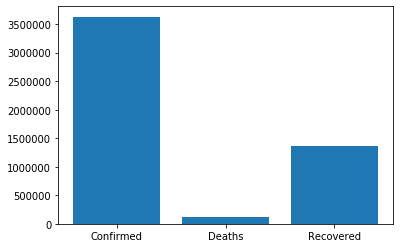

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(cases,sum_of_cases)

([<matplotlib.patches.Wedge at 0x1ad549744e0>,
 [Text(-0.6773029806816354, 0.8667529477075763, 'Confirmed'),
  Text(-0.25709896171363633, -1.4778024644335148, 'Deaths'),
  Text(0.7378371708263465, -0.8158408603073108, 'Recovered')])

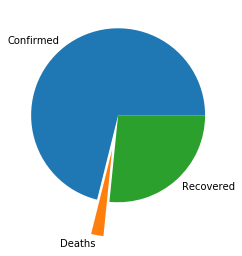

In [8]:
plt.pie(sum_of_cases,labels=cases,explode=(0,0.4,0)) #explode=(0,0.4,0) extracts the second item in the list

The code below is a modification to snippet [6] above. It initializes each sum as an element of a list

In [10]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    sum_of_cases=[0]*3 # create the list [0,0,0]
    for row in csv_reader:
        sum_of_cases[0] +=float(row['Confirmed']) # converts the item to a float , then increaments the value in the list
        sum_of_cases[1] +=float(row['Deaths'])
        sum_of_cases[2] +=float(row['Recovered'])

print(sum_of_cases)
cases=["Confirmed","Deaths","Recovered"]

[3629156.0, 116833.0, 1357313.0]


## Rates of cases

In [12]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    reported_cases={"Confirmed":[],"Deaths":[],"Recovered":[]} #  A dictionary of the list of reported cases(initialization)
    for row in csv_reader:
        reported_cases["Confirmed"].append(float(row['Confirmed']))# appends each item to the list in the dictionary
        reported_cases["Deaths"].append(float(row['Deaths']))
        reported_cases['Recovered'].append(float(row['Recovered']))

print(reported_cases)

{'Confirmed': [1.0, 14.0, 6.0, 1.0, 0.0, 26.0, 2.0, 1.0, 4.0, 1.0, 0.0, 5.0, 0.0, 444.0, 4.0, 0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 9.0, 1.0, 5.0, 1.0, 4.0, 0.0, 1.0, 0.0, 1.0, 10.0, 2.0, 2.0, 1.0, 9.0, 22.0, 9.0, 5.0, 2.0, 32.0, 5.0, 3.0, 5.0, 1.0, 2.0, 5.0, 2.0, 444.0, 9.0, 0.0, 5.0, 7.0, 1.0, 3.0, 2.0, 1.0, 0.0, 3.0, 6.0, 16.0, 1.0, 8.0, 1.0, 4.0, 0.0, 1.0, 2.0, 2.0, 27.0, 1.0, 3.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 549.0, 53.0, 43.0, 36.0, 27.0, 24.0, 23.0, 20.0, 18.0, 15.0, 15.0, 15.0, 10.0, 9.0, 9.0, 8.0, 8.0, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 5.0, 2.0, 3.0, 2.0, 2.0, 761.0, 78.0, 62.0, 57.0, 43.0, 41.0, 39.0, 33.0, 32.0, 28.0, 27.0, 23.0, 19.0, 18.0, 18.0, 18.0, 17.0, 15.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 7.0, 2.0, 3.0, 2.0, 3.0, 4.0, 1.0, 3.0, 1058.0, 111.0, 104.0, 83.0, 75.0, 69.0, 68.0, 60.0, 46.0, 44.0, 40.0, 36.0, 36.0, 35.0, 33.0, 

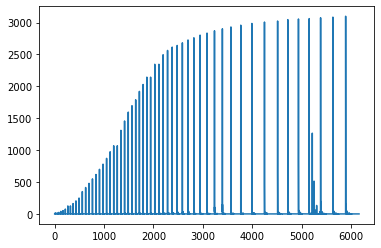

In [13]:
plt.plot(range(1,len(reported_cases["Deaths"])+1),reported_cases["Deaths"]) # a line plot for the number of deaths
#

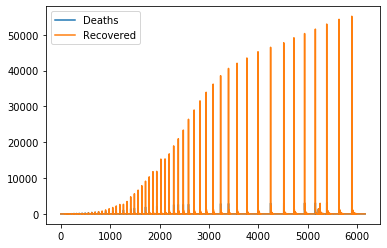

In [14]:
# A not recommended plot for number of Deaths and Recovery 
# In the plot , the cases for recovery over shadows that of deaths , since the numbers are more and it is the second plot
plt.plot(range(1,len(reported_cases["Deaths"])+1),reported_cases["Deaths"],label="Deaths")
plt.plot(range(1,len(reported_cases["Recovered"])+1),reported_cases["Recovered"],label="Recovered")
plt.legend()

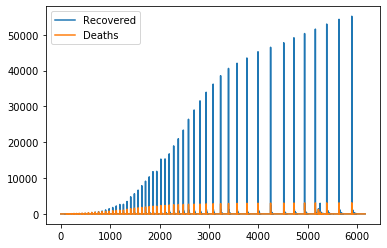

In [15]:
# The order of plot is reversed here to make the number of Deaths visible  
plt.plot(range(1,len(reported_cases["Recovered"])+1),reported_cases["Recovered"],label="Recovered")
plt.plot(range(1,len(reported_cases["Deaths"])+1),reported_cases["Deaths"],label="Deaths")
plt.legend()

Activities are given to the participants to use the stem/lollipop plot to visualize these seperately and on the same axis